In [1]:
import scipy.io as sio  # for loading matlab data

import pandas as pd

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
data = sio.loadmat("GOOG_20141124.mat")

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

# Midprice

In [4]:
midprice = 0.5*(bid[:,0]+ask[:,0])

In [5]:
data = pd.DataFrame(midprice)

In [6]:
data.describe()

,0
count,234000.000000
mean,539.920772
std,1.244963
min,535.845000
25%,539.015000
50%,539.620000
75%,541.080000
max,542.670000


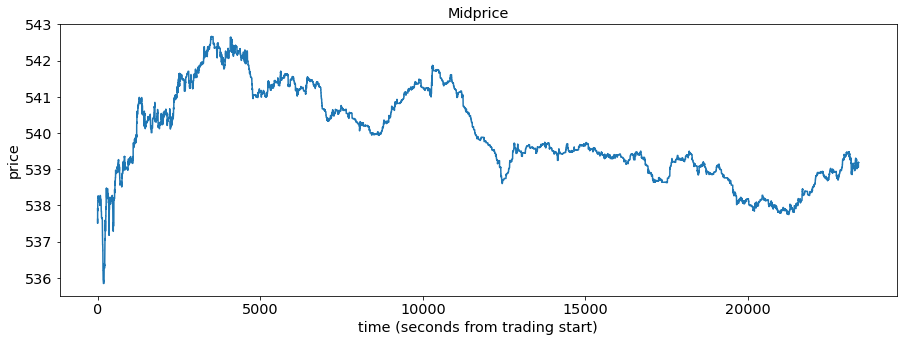

In [7]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

# Microprice

In [8]:
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])

In [11]:
data = pd.DataFrame(microprice)

In [12]:
data.describe()

,0
count,234000.000000
mean,539.917036
std,1.249983
min,535.701613
25%,539.001569
50%,539.622870
75%,541.086957
max,542.722973


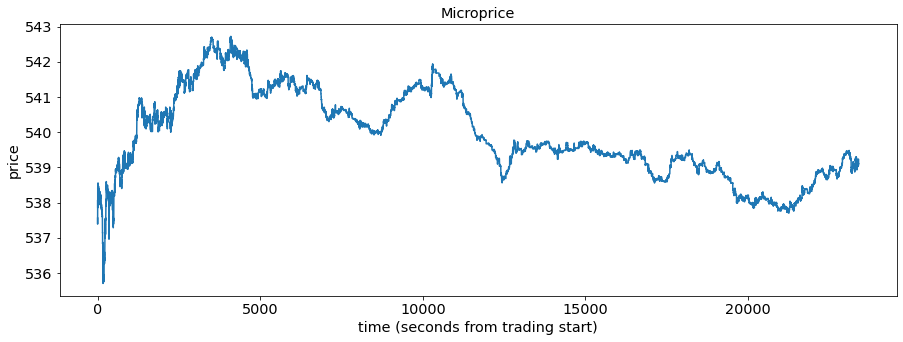

In [13]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

# Spread

In [14]:
spread = ask[:,0]-bid[:,0]

In [15]:
data = pd.DataFrame(spread)

In [16]:
data.describe()

,0
count,234000.000000
mean,0.129414
std,0.075450
min,0.010000
25%,0.080000
50%,0.120000
75%,0.160000
max,0.940000


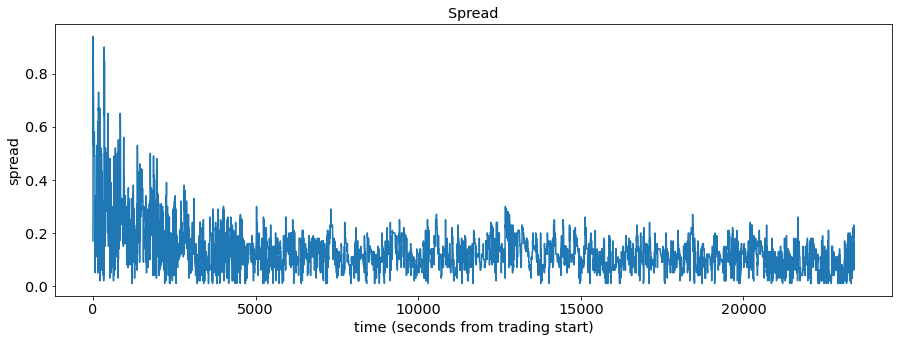

In [17]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [18]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

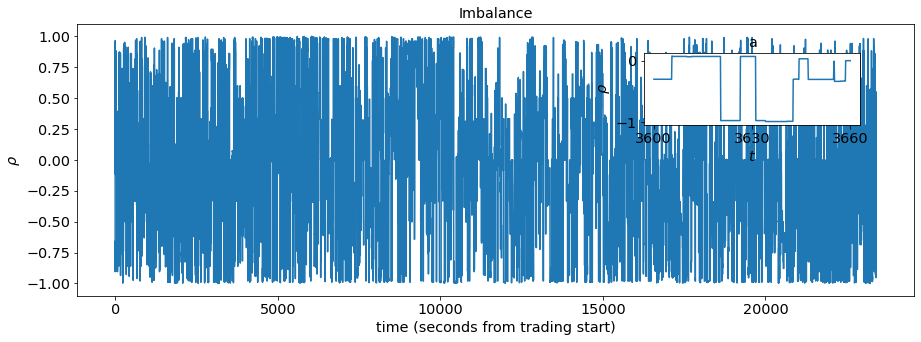

In [19]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [20]:
data = pd.DataFrame(rho)

In [21]:
data.describe()

,0
count,234000.000000
mean,-0.078097
std,0.578891
min,-0.999730
25%,-0.500000
50%,-0.009901
75%,0.333333
max,0.999200


# Liquidation with Permanent Price Impact

In [23]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

In [26]:
# Parameter settings
T = 1
Ndt = 6.5 * 3600 
dt = T / Ndt
t = np.arange(0, T + dt, dt) 

k = 0.002 
b = 0.004 

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([0.0001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100

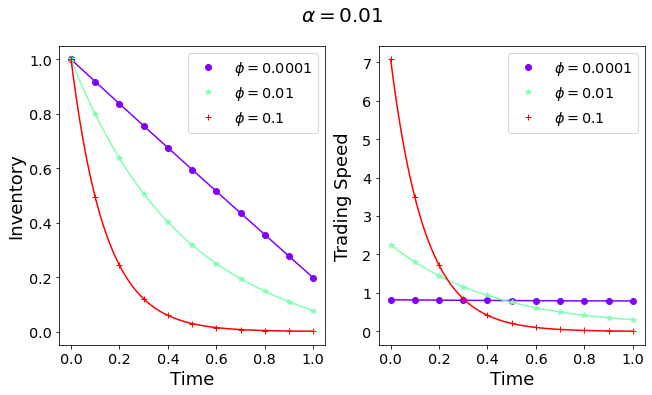

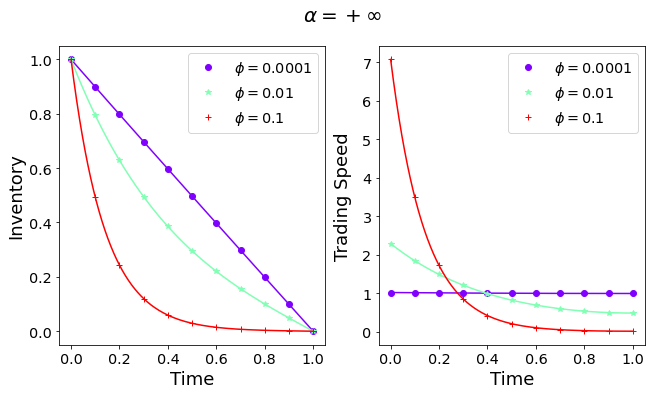

In [27]:

lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(10000, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")

# Non-Linear Temporary Price Impact

In [29]:
a = np.array([1, 0.8, 0.6])
k = 0.0002
b = 0.0004

phi = 10 * k
alpha = 100 * k
T = 1
qmax = 1

Ndt = 10000
Ndq = 100

dt = T / Ndt
dq = qmax / Ndq

In [30]:
nus, Qs, myleg, t, q = lppi_helpers.solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq)

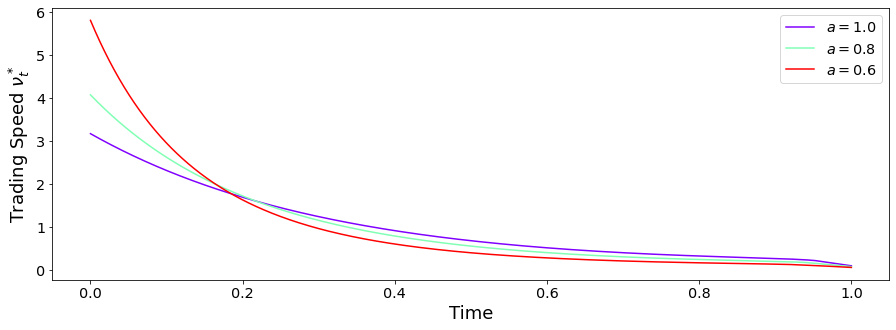

In [31]:
lppi_helpers.plot_multiple(t, nus.T, r"Time", r"Trading Speed $\nu^*_t$", None, myleg)

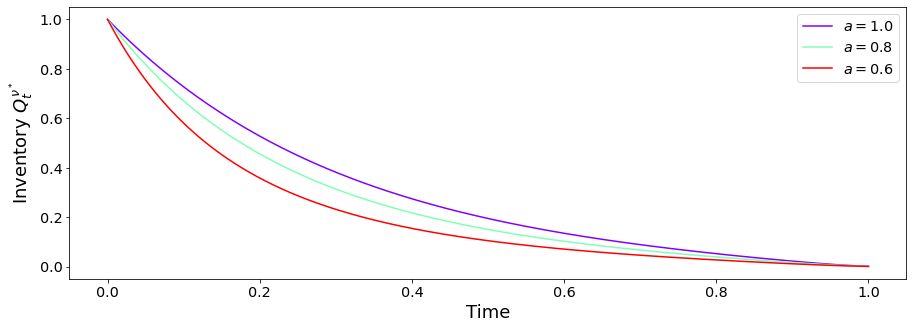

In [33]:
lppi_helpers.plot_multiple(t, Qs.T, r"Time", r"Inventory $Q_t^{\nu^*}$", None, myleg)